# `pymops`: A multi-agent simulation-based optimization package for power scheduling

### Install package using pip

In [1]:
!pip install pymops

### If already installed, upgrade to latest version

In [1]:
!pip install --upgrade pymops

In [2]:
!pip show pymops

Name: pymops
Version: 1.0.5
Summary: A multi-agent simulation-based optimization package for power scheduling
Home-page: https://github.com/awolseid/pymops
Author: Awol Seid Ebrie and Young Jin Kim
Author-email: es.awol@gmail.com
License: MIT
Location: c:\users\esawo\anaconda3\lib\site-packages
Requires: scipy, numpy, pandas, torch, tqdm
Required-by: 


### Clone it from its GitHub repo: `!git clone https://github.com/awolseid/pymops.git`

### Import data from GitHub repo

In [50]:
import pandas as pd
pd.set_option('display.max_columns', 100)

sup_url = "https://github.com/awolseid/pymops/raw/main/pymops/data/supply_profiles.csv"
dem_url = "https://github.com/awolseid/pymops/raw/main/pymops/data/demand_profiles.csv"

supply_df = pd.read_csv(sup_url)
demand_df = pd.read_csv(dem_url)

In [51]:
supply_df.T

,0,1,2,3,4,5,6,7,8,9
UnitID,U1,U2,U3,U4,U5,U6,U7,U8,U9,U10
MaxCap,455,455,130,130,162,80,85,55,55,55
MinCap,150,150,20,20,25,20,25,10,10,10
aCost,0.00048,0.00031,0.002,0.00211,0.00398,0.00712,0.00079,0.00413,0.00222,0.00173
bCost,16.19,17.26,16.6,16.5,19.7,22.26,27.74,25.92,27.27,27.79
cCost,1000,970,700,680,450,370,480,660,665,670
dCost,450,600,320,260,280,310,300,340,270,380
eCost,0.041,0.036,0.028,0.052,0.063,0.048,0.086,0.082,0.098,0.094
aEmis,0.0046,0.0046,0.0068,0.0068,0.0042,0.0042,0.04652,0.04652,0.04652,0.04702
bEmis,-0.5112,-0.5112,0.5455,-0.5455,0.3277,0.3277,-3.9023,-3.9023,-3.9524,-3.9864


In [6]:
import pymops
from pymops.environ import SimEnv
from pymops.define_dqn import DQNet
from pymops.madqn import DQNAgents
from pymops.replaymemory import ReplayMemory
from pymops.schedules import get_schedules

In [8]:
env = SimEnv(
            supply_df  = supply_df,    # Units' profile dataframe; n_units = len(supply_df)
            demand_df  = demand_df,    # Demands profile; n_timesteps = len(demand_df)
            n_objs     = None,         # Objectives => "tri" for 3 or "bi" (default = None) for bi-objective
            SR         = 0.10,         # proportion of spinning reserve => [0, 1] (default => 0.0)
            RR         = None,         # Ramp rate => "Yes" or "No" (default = None)) 
            VPE        = None,         # Valve point effects => "Yes" or "No" (default = None)
            w          = None,         # Weight => 0 <= w <=1] (default = 1) for bi-objective 
                                       # Weight is a list [0.2,0.3,0.5] for tri-objective
            duplicates = None          # duplicate units and adjust demands proportionally (default => None (= 1))
        )

"ECONOMIC COST" Optimization: RR = no, VPE = no, SR = 0.1


In [9]:
initial_flat_state, initial_dict_state = env.reset()

In [10]:
initial_flat_state

array([  1,   8,   8,  -5,  -5,  -6,  -3,  -3,  -1,  -1,  -1, 700],
      dtype=int64)

In [11]:
initial_dict_state

{'timestep': 1,
 'demand': 700,
 'min_capacities': array([150, 150,  20,  20,  25,  20,  25,  10,  10,  10], dtype=int64),
 'max_capacities': array([455, 455, 130, 130, 162,  80,  85,  55,  55,  55], dtype=int64),
 'operating_statuses': array([ 8,  8, -5, -5, -6, -3, -3, -1, -1, -1], dtype=int64),
 'commitments': array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0]),
 'start_costs_if_ON': array([  0,   0, 550, 560, 900, 170, 260,  30,  30,  30], dtype=int64),
 'shut_costs_if_OFF': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 'start_emiss_if_ON': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'shut_emiss_if_OFF': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'start_emis1s_if_ON': None,
 'shut_emis1s_if_OFF': None,
 'start_emis2s_if_ON': None,
 'shut_emis2s_if_OFF': None}

In [12]:
initial_dict_state

{'timestep': 1,
 'demand': 700,
 'min_capacities': array([150, 150,  20,  20,  25,  20,  25,  10,  10,  10], dtype=int64),
 'max_capacities': array([455, 455, 130, 130, 162,  80,  85,  55,  55,  55], dtype=int64),
 'operating_statuses': array([ 8,  8, -5, -5, -6, -3, -3, -1, -1, -1], dtype=int64),
 'commitments': array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0]),
 'start_costs_if_ON': array([  0,   0, 550, 560, 900, 170, 260,  30,  30,  30], dtype=int64),
 'shut_costs_if_OFF': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 'start_emiss_if_ON': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'shut_emiss_if_OFF': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'start_emis1s_if_ON': None,
 'shut_emis1s_if_OFF': None,
 'start_emis2s_if_ON': None,
 'shut_emis2s_if_OFF': None}

In [13]:
flat_state, dict_state = env.get_current_state()

In [14]:
flat_state

array([  1,   8,   8,  -5,  -5,  -6,  -3,  -3,  -1,  -1,  -1, 700],
      dtype=int64)

In [15]:
dict_state

{'timestep': 1,
 'demand': 700,
 'min_capacities': array([150, 150,  20,  20,  25,  20,  25,  10,  10,  10], dtype=int64),
 'max_capacities': array([455, 455, 130, 130, 162,  80,  85,  55,  55,  55], dtype=int64),
 'operating_statuses': array([ 8,  8, -5, -5, -6, -3, -3, -1, -1, -1], dtype=int64),
 'commitments': array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0]),
 'start_costs_if_ON': array([  0,   0, 550, 560, 900, 170, 260,  30,  30,  30], dtype=int64),
 'shut_costs_if_OFF': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 'start_emiss_if_ON': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'shut_emiss_if_OFF': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'start_emis1s_if_ON': None,
 'shut_emis1s_if_OFF': None,
 'start_emis2s_if_ON': None,
 'shut_emis2s_if_OFF': None}

In [16]:
action_vec = [1,1,0,1,0,0,0,0,0,0]
flat_next_state, reward, done, next_state_dict, dispatch_info = env.step(action_vec)

In [17]:
flat_next_state

array([  2,   9,   9,  -6,   1,  -7,  -4,  -4,  -2,  -2,  -2, 750],
      dtype=int64)

In [18]:
reward

4.3496757260788526

In [19]:
done

False

In [20]:
next_state_dict

{'timestep': 2,
 'demand': 750,
 'min_capacities': array([150, 150,  20,  20,  25,  20,  25,  10,  10,  10], dtype=int64),
 'max_capacities': array([455, 455, 130, 130, 162,  80,  85,  55,  55,  55], dtype=int64),
 'operating_statuses': array([ 9,  9, -6,  1, -7, -4, -4, -2, -2, -2], dtype=int64),
 'commitments': array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0]),
 'start_costs_if_ON': array([  0,   0, 550,   0, 900, 170, 260,  60,  60,  60], dtype=int64),
 'shut_costs_if_OFF': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 'start_emiss_if_ON': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'shut_emiss_if_OFF': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'start_emis1s_if_ON': None,
 'shut_emis1s_if_OFF': None,
 'start_emis2s_if_ON': None,
 'shut_emis2s_if_OFF': None}

In [21]:
dispatch_info

{'timestep': 1,
 'commitments': array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0]),
 'demand': 700,
 'action_vec': array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0]),
 'loads': array([455., 150.,   0.,  95.,   0.,   0.,   0.,   0.,   0.,   0.]),
 'start_cost': 560,
 'shut_cost': 0,
 'prod_cost': 14298.3,
 'total_cost': 14858.3,
 'start_emis': 0.0,
 'shut_emis': 0.0,
 'prod_emis': 882.1,
 'total_emis': 882.1,
 'start_emis1': None,
 'shut_emis1': None,
 'prod_emis1': None,
 'total_emis1': None,
 'start_emis2': None,
 'shut_emis2': None,
 'prod_emis2': None,
 'total_emis2': None}

## 1. Bi-Objective Problem

### 1.1. No Ramp Rate Constraints and Without Valve Point Effects

In [22]:
env1 = SimEnv(supply_df  = supply_df,
              demand_df  = demand_df,
              n_objs     = "Bi",
              SR         = 0.10,
              RR         = "No",
              VPE        = "No",
              w          = 0.36,
             )

model1 = DQNet(environ = env1,
               hidden_nodes = 64                        # default => 32
              ) 

RL_agents1 = DQNAgents(environ       = env1,
                       model         = model1,
                       epsilon_max   = 1.0,              # <= default
                       epsilon_min   = 0.0,              # <= default
                       epsilon_decay = 0.999,            # default => 1.0
                       lr            = 0.01,             # default => 0.003
                       lr_gamma      = 1.0,              # <= default
                       gamma         = 0.99              # <= default
                      )

memory1 = ReplayMemory(environ = env1,
                       buffer_size = 64                  # default => 32
                      )

results1_df = RL_agents1.train(memory       = memory1,
                               batch_size   = 64,         # default => None (= buffer_size)
                               num_episodes = 8000        # default => 100
                              )
results1_df.to_excel('results_bi-ojective_RR-No_VPE-No.xlsx', index = False)
results1_df

DUAL OBJECTIVES (Cost and Emission): w = [0.36, 0.64] RR = no, VPE = no, SR = 0.1


  0%|          | 0/8000 [00:00<?, ?it/s]

Episode: 800 | Steps = 24.0 | Rewards = 82.07 | Eps. = 0.450 | LR = 0.010 | Cost = 586812.3 | Emis. = 45943.1 | 
Episode: 1600 | Steps = 24.0 | Rewards = 85.35 | Eps. = 0.202 | LR = 0.010 | Cost = 570125.3 | Emis. = 41754.4 | 
Episode: 2400 | Steps = 24.0 | Rewards = 87.76 | Eps. = 0.091 | LR = 0.010 | Cost = 568080.4 | Emis. = 41310.2 | 
Episode: 3200 | Steps = 24.0 | Rewards = 88.45 | Eps. = 0.041 | LR = 0.010 | Cost = 568080.5 | Emis. = 41310.4 | 
Episode: 4000 | Steps = 24.0 | Rewards = 88.45 | Eps. = 0.018 | LR = 0.010 | Cost = 568080.7 | Emis. = 41310.2 | 
Episode: 4800 | Steps = 24.0 | Rewards = 88.45 | Eps. = 0.008 | LR = 0.010 | Cost = 568080.4 | Emis. = 41310.5 | 
Episode: 5600 | Steps = 24.0 | Rewards = 88.45 | Eps. = 0.004 | LR = 0.010 | Cost = 571338.1 | Emis. = 41925.8 | 
Episode: 6400 | Steps = 24.0 | Rewards = 88.45 | Eps. = 0.002 | LR = 0.010 | Cost = 568080.4 | Emis. = 41310.4 | 
Episode: 7200 | Steps = 24.0 | Rewards = 88.45 | Eps. = 0.001 | LR = 0.010 | Cost = 56808

,Episode,Timesteps,Rewards,Startup Cost,Shutdown Cost,Production Cost,Total Cost,Startup Emission,Shutup Emission,Production Emission,Total Emission
0,1.0,24,76.834431,4510.0,0.0,593621.2,598131.2,0.0,0.0,49748.0,49748.0
1,2.0,24,75.274328,4800.0,0.0,592791.8,597591.8,0.0,0.0,47935.8,47935.8
2,3.0,24,75.641672,4170.0,0.0,599640.0,603810.0,0.0,0.0,49114.4,49114.4
3,4.0,24,77.763356,4900.0,0.0,596990.9,601890.9,0.0,0.0,50838.2,50838.2
4,5.0,24,74.996764,4080.0,0.0,596331.6,600411.6,0.0,0.0,49780.3,49780.3
...,...,...,...,...,...,...,...,...,...,...,...
7995,7996.0,24,88.453964,4090.0,0.0,563990.3,568080.3,0.0,0.0,41310.5,41310.5
7996,7997.0,24,88.453970,4090.0,0.0,563990.4,568080.4,0.0,0.0,41310.4,41310.4
7997,7998.0,24,88.453940,4090.0,0.0,563990.6,568080.6,0.0,0.0,41310.4,41310.4
7998,7999.0,24,88.453962,4090.0,0.0,563990.3,568080.3,0.0,0.0,41310.4,41310.4


In [23]:
schedules1_df = get_schedules(environ = env1, trained_agents = RL_agents1)
schedules1_df.to_excel('schedules_bi-ojective_RR-No_VPE-No.xlsx', index = False)
schedules1_df

Total Cost = 568080.3 $/day.
Total Emission = 41310.4 lbs/day.


,Hour,Demand,U1,U2,U3,U4,U5,U6,U7,U8,U9,U10,P_1,P_2,P_3,P_4,P_5,P_6,P_7,P_8,P_9,P_10,Reserve (%),Startup Cost,Shutdown Cost,Production Cost,Total Cost,Startup Emission,Shutdown Emission,Production Emission,Total Emission
0,1,700.0,1,1,0,0,0,0,0,0,0,0,375.8,324.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,13750.3,13750.3,0.0,0.0,861.1,861.1
1,2,750.0,1,1,0,0,0,0,0,0,0,0,400.6,349.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.3,0.0,0.0,14601.2,14601.2,0.0,0.0,1002.2,1002.2
2,3,850.0,1,1,0,0,1,0,0,0,0,0,405.5,354.3,0.0,0.0,90.2,0.0,0.0,0.0,0.0,0.0,26.1,900.0,0.0,17027.5,17927.5,0.0,0.0,1108.7,1108.7
3,4,950.0,1,1,0,0,1,0,0,0,0,0,442.5,391.7,0.0,0.0,115.9,0.0,0.0,0.0,0.0,0.0,12.8,0.0,0.0,18821.2,18821.2,0.0,0.0,1373.8,1373.8
4,5,1000.0,1,1,0,1,1,0,0,0,0,0,412.9,361.7,0.0,130.0,95.4,0.0,0.0,0.0,0.0,0.0,20.2,560.0,0.0,20246.3,20806.3,0.0,0.0,1243.5,1243.5
5,6,1100.0,1,1,1,1,1,0,0,0,0,0,401.8,350.5,130.0,130.0,87.7,0.0,0.0,0.0,0.0,0.0,21.1,1100.0,0.0,22601.0,23701.0,0.0,0.0,1394.3,1394.3
6,7,1150.0,1,1,1,1,1,0,0,0,0,0,420.3,369.2,130.0,130.0,100.5,0.0,0.0,0.0,0.0,0.0,15.8,0.0,0.0,23496.6,23496.6,0.0,0.0,1521.4,1521.4
7,8,1200.0,1,1,1,1,1,0,0,0,0,0,438.8,387.9,130.0,130.0,113.3,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,24394.0,24394.0,0.0,0.0,1656.3,1656.3
8,9,1300.0,1,1,1,1,1,1,1,0,0,0,455.0,409.3,130.0,130.0,128.0,21.7,25.9,0.0,0.0,0.0,15.2,860.0,0.0,27399.1,28259.1,0.0,0.0,2085.1,2085.1
9,10,1400.0,1,1,1,1,1,1,1,1,0,0,455.0,441.4,130.0,130.0,149.9,37.7,28.5,27.5,0.0,0.0,10.9,60.0,0.0,30226.2,30286.2,0.0,0.0,2490.5,2490.5


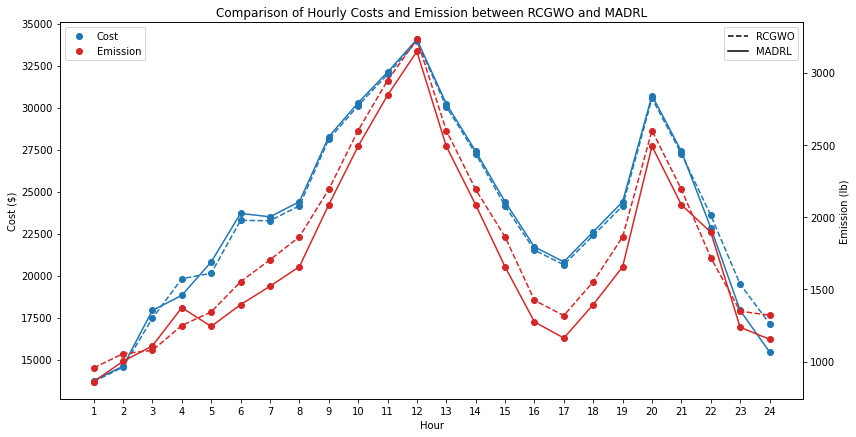

In [24]:
hours = list(range(1, 25))

rcgwo_cost = [13683.1, 14554.5, 17452.1, 19811.5, 20132.5, 23287.1, 23262.0, 24150.3, 
              28111.1, 30117.6, 31976.1, 33950.2, 30057.6, 27251.1, 24150.3, 21513.7, 
              20641.8, 22387.1, 24150.3, 30547.6, 27251.1, 23593.0, 19480.8, 17142.8]

rcgwo_emission = [956.4, 1055.0, 1077.4, 1249.8, 1343.8, 1552.7, 1704.2, 1863.1, 
                  2191.3, 2599.2, 2945.2, 3229.4, 2599.2, 2191.3, 1863.1, 1424.2, 
                  1318.6, 1552.7, 1863.1, 2599.2, 2191.3, 1719.6, 1348.9, 1321.1]

madrl_cost = schedules1_df["Total Cost"].to_numpy()
madrl_emission = schedules1_df["Total Emission"].to_numpy()

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Hour')
ax1.set_ylabel('Cost ($)')
ax1.plot(hours, rcgwo_cost, color='tab:blue', label='RCGWO Cost', linestyle='--', marker='o')
ax1.plot(hours, madrl_cost, color='tab:blue', label='MADRL Cost', linestyle='-', marker='o')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.set_ylabel('Emission (lb)')
ax2.plot(hours, rcgwo_emission, color='tab:red', label='RCGWO Emission', linestyle='--', marker='o')
ax2.plot(hours, madrl_emission, color='tab:red', label='MADRL Emission', linestyle='-', marker='o')
ax2.tick_params(axis='y')

legend_lines_methods = [Line2D([0], [0], color='black', linestyle='--', marker=' '),
                        Line2D([0], [0], color='black', linestyle='-', marker=' ')]
ax1.legend(legend_lines_methods, ['RCGWO', 'MADRL'], loc='upper right')

legend_lines_objectives = [Line2D([0], [0], color='tab:blue', linestyle=' ', marker='o'),
                           Line2D([0], [0], color='tab:red', linestyle=' ', marker='o')]
ax2.legend(legend_lines_objectives, ['Cost', 'Emission'], loc='upper left')

ax1.set_xticks(hours)
ax1.set_xticklabels(range(1, 25))

fig.tight_layout()
plt.title('Comparison of Hourly Costs and Emission between RCGWO and MADRL')
plt.savefig('fig.png', dpi=300)
plt.show()


### 1.2. Ramp Rates Constrained and Without Valve Point Effects

In [25]:
env2 = SimEnv(supply_df  = supply_df,
              demand_df  = demand_df,
              SR         = 0.10,
              RR         = "Yes",
              VPE        = "No",
              w          = 0.38,
             )

model2 = DQNet(environ = env2,
               hidden_nodes = 64
              ) 

RL_agents2 = DQNAgents(environ       = env2,
                       model         = model2,
                       epsilon_decay = 0.999,
                       lr            = 0.01,
                      )

memory2 = ReplayMemory(environ = env2,
                       buffer_size = 64
                      )

results2_df = RL_agents2.train(memory       = memory2,
                               batch_size   = 64,
                               num_episodes = 8000
                              )
results2_df.to_excel('results_bi-ojective_RR-Yes_VPE-No.xlsx', index = False)
results2_df

DUAL OBJECTIVES (Cost and Emission): w = [0.38, 0.62] RR = yes, VPE = no, SR = 0.1


  0%|          | 0/8000 [00:00<?, ?it/s]

C:\Users\esawo\anaconda3\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Episode: 800 | Steps = 24.0 | Rewards = 84.20 | Eps. = 0.450 | LR = 0.010 | Cost = 586040.7 | Emis. = 44756.1 | 
Episode: 1600 | Steps = 24.0 | Rewards = 84.99 | Eps. = 0.202 | LR = 0.010 | Cost = 576887.3 | Emis. = 44406.6 | 
Episode: 2400 | Steps = 24.0 | Rewards = 86.95 | Eps. = 0.091 | LR = 0.010 | Cost = 579115.5 | Emis. = 47145.3 | 
Episode: 3200 | Steps = 24.0 | Rewards = 88.19 | Eps. = 0.041 | LR = 0.010 | Cost = 567197.0 | Emis. = 41810.8 | 
Episode: 4000 | Steps = 24.0 | Rewards = 88.26 | Eps. = 0.018 | LR = 0.010 | Cost = 569478.7 | Emis. = 42499.4 | 
Episode: 4800 | Steps = 24.0 | Rewards = 88.19 | Eps. = 0.008 | LR = 0.010 | Cost = 567197.0 | Emis. = 41810.7 | 
Episode: 5600 | Steps = 24.0 | Rewards = 88.19 | Eps. = 0.004 | LR = 0.010 | Cost = 567196.9 | Emis. = 41810.7 | 
Episode: 6400 | Steps = 24.0 | Rewards = 88.19 | Eps. = 0.002 | LR = 0.010 | Cost = 567196.8 | Emis. = 41810.8 | 
Episode: 7200 | Steps = 24.0 | Rewards = 88.19 | Eps. = 0.001 | LR = 0.010 | Cost = 56719

,Episode,Timesteps,Rewards,Startup Cost,Shutdown Cost,Production Cost,Total Cost,Startup Emission,Shutup Emission,Production Emission,Total Emission
0,1.0,24,75.848183,4200.0,0.0,600635.2,604835.2,0.0,0.0,50489.0,50489.0
1,2.0,24,76.275462,4080.0,0.0,595143.8,599223.8,0.0,0.0,51070.2,51070.2
2,3.0,24,76.796129,4540.0,0.0,599838.3,604378.3,0.0,0.0,50632.2,50632.2
3,4.0,24,77.824867,4500.0,0.0,603387.0,607887.0,0.0,0.0,52277.7,52277.7
4,5.0,24,76.701854,4030.0,0.0,595247.6,599277.6,0.0,0.0,49268.8,49268.8
...,...,...,...,...,...,...,...,...,...,...,...
7995,7996.0,24,88.186228,4090.0,0.0,563107.1,567197.1,0.0,0.0,41810.8,41810.8
7996,7997.0,24,88.186250,4090.0,0.0,563107.2,567197.2,0.0,0.0,41810.8,41810.8
7997,7998.0,24,88.186229,4090.0,0.0,563107.1,567197.1,0.0,0.0,41810.8,41810.8
7998,7999.0,24,88.186247,4090.0,0.0,563107.0,567197.0,0.0,0.0,41810.8,41810.8


In [26]:
schedules2_df = get_schedules(environ = env2, trained_agents = RL_agents2)
schedules2_df.to_excel('schedules_bi-ojective_RR-Yes_VPE-No.xlsx', index = False)
schedules2_df

Total Cost = 567197.1 $/day.
Total Emission = 41810.8 lbs/day.


,Hour,Demand,U1,U2,U3,U4,U5,U6,U7,U8,U9,U10,P_1,P_2,P_3,P_4,P_5,P_6,P_7,P_8,P_9,P_10,Reserve (%),Startup Cost,Shutdown Cost,Production Cost,Total Cost,Startup Emission,Shutdown Emission,Production Emission,Total Emission
0,1,700.0,1,1,0,0,0,0,0,0,0,0,377.9,322.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,13748.3,13748.3,0.0,0.0,862.1,862.1
1,2,750.0,1,1,0,0,0,0,0,0,0,0,402.7,347.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.3,0.0,0.0,14599.3,14599.3,0.0,0.0,1003.2,1003.2
2,3,850.0,1,1,0,0,1,0,0,0,0,0,411.6,356.2,0.0,0.0,82.3,0.0,0.0,0.0,0.0,0.0,26.1,900.0,0.0,16998.9,17898.9,0.0,0.0,1125.3,1125.3
3,4,950.0,1,1,0,0,1,0,0,0,0,0,448.7,393.8,0.0,0.0,107.5,0.0,0.0,0.0,0.0,0.0,12.8,0.0,0.0,18789.8,18789.8,0.0,0.0,1392.3,1392.3
4,5,1000.0,1,1,0,1,1,0,0,0,0,0,419.0,363.7,0.0,130.0,87.3,0.0,0.0,0.0,0.0,0.0,20.2,560.0,0.0,20217.2,20777.2,0.0,0.0,1260.5,1260.5
5,6,1100.0,1,1,1,1,1,0,0,0,0,0,407.9,352.4,130.0,130.0,79.7,0.0,0.0,0.0,0.0,0.0,21.1,1100.0,0.0,22572.6,23672.6,0.0,0.0,1410.7,1410.7
6,7,1150.0,1,1,1,1,1,0,0,0,0,0,426.4,371.2,130.0,130.0,92.3,0.0,0.0,0.0,0.0,0.0,15.8,0.0,0.0,23466.9,23466.9,0.0,0.0,1538.7,1538.7
7,8,1200.0,1,1,1,1,1,0,0,0,0,0,445.0,390.1,130.0,130.0,105.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,24362.9,24362.9,0.0,0.0,1674.5,1674.5
8,9,1300.0,1,1,1,1,1,1,1,0,0,0,455.0,417.0,130.0,130.0,123.0,20.0,25.0,0.0,0.0,0.0,15.2,860.0,0.0,27365.0,28225.0,0.0,0.0,2103.9,2103.9
9,10,1400.0,1,1,1,1,1,1,1,1,0,0,455.0,455.0,130.0,130.0,148.7,32.5,25.7,23.0,0.0,0.0,10.9,60.0,0.0,30128.5,30188.5,0.0,0.0,2545.2,2545.2


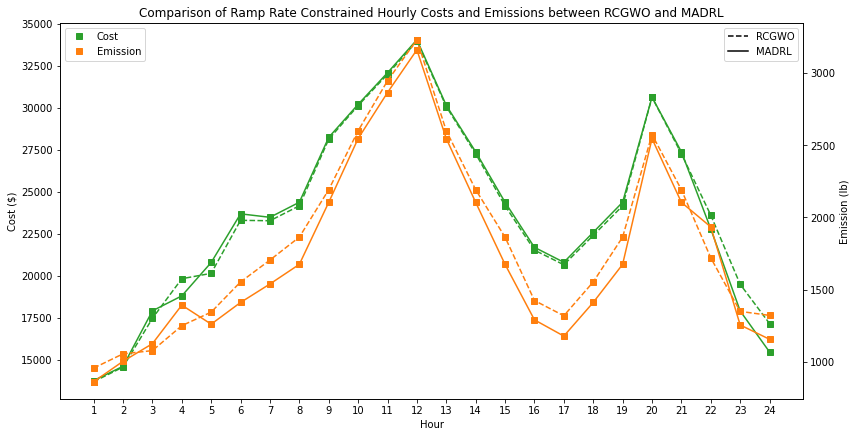

In [27]:
hours = list(range(1, 25))

rcgwo_cost = [13683.0, 14554.4, 17452.0, 19811.4, 20132.4, 23287.2, 23262.1, 24150.1,
              28111.3, 30117.8, 31976.3, 33950.4, 30057.8, 27251.3, 24150.1, 21513.8,
              20642.0, 22387.2, 24150.1, 30614.9, 27251.3, 23593.1, 19481.0, 17142.9]

rcgwo_emission = [956.4, 1055.0, 1077.3, 1249.8, 1343.8, 1552.7, 1704.3, 1863.1,
                  2191.3, 2599.2, 2945.2, 3229.4, 2599.2, 2191.3, 1863.1, 1424.2,
                  1318.6, 1552.7, 1863.1, 2573.1, 2191.3, 1719.6, 1349.0, 1321.1]

madrl_cost = schedules2_df["Total Cost"].to_numpy()
madrl_emission = schedules2_df["Total Emission"].to_numpy()

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Hour')
ax1.set_ylabel('Cost ($)')
ax1.plot(hours, rcgwo_cost, color='tab:green', label='RCGWO Cost', linestyle='--', marker='s')
ax1.plot(hours, madrl_cost, color='tab:green', label='MADRL Cost', linestyle='-', marker='s')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.set_ylabel('Emission (lb)')
ax2.plot(hours, rcgwo_emission, color='tab:orange', label='RCGWO Emission', linestyle='--', marker='s')
ax2.plot(hours, madrl_emission, color='tab:orange', label='MADRL Emission', linestyle='-', marker='s')
ax2.tick_params(axis='y')

legend_lines_methods = [Line2D([0], [0], color='black', linestyle='--', marker=' '),
                        Line2D([0], [0], color='black', linestyle='-', marker=' ')]
ax1.legend(legend_lines_methods, ['RCGWO', 'MADRL'], loc='upper right')

legend_lines_objectives = [Line2D([0], [0], color='tab:green', linestyle=' ', marker='s'),
                           Line2D([0], [0], color='tab:orange', linestyle=' ', marker='s')]
ax2.legend(legend_lines_objectives, ['Cost', 'Emission'], loc='upper left')

ax1.set_xticks(hours)
ax1.set_xticklabels(range(1, 25))

fig.tight_layout()
plt.title('Comparison of Ramp Rate Constrained Hourly Costs and Emissions between RCGWO and MADRL')
plt.savefig('fig.png', dpi=300)
plt.show()

### 1.3. With Valve Point Effects and No Ramp Rate Constraints

In [28]:
env3 = SimEnv(supply_df  = supply_df,
              demand_df  = demand_df,
              SR         = 0.10,
              RR         = "No",
              VPE        = "Yes",
              w          = 0.92,
             )

model3 = DQNet(environ = env,
               hidden_nodes = 64
              ) 

RL_agents3 = DQNAgents(environ       = env3,
                       model         = model3,
                       epsilon_decay = 0.999,
                       lr            = 0.01,
                      )

memory3 = ReplayMemory(environ = env3,
                       buffer_size = 64
                      )

results3_df = RL_agents3.train(memory       = memory3,
                               batch_size   = 64,
                               num_episodes = 8000
                              )
results3_df.to_excel('results_bi-ojective_RR-No_VPE-Yes.xlsx', index = False)
results3_df

DUAL OBJECTIVES (Cost and Emission): w = [0.92, 0.07999999999999996] RR = no, VPE = yes, SR = 0.1


  0%|          | 0/8000 [00:00<?, ?it/s]

Episode: 800 | Steps = 24.0 | Rewards = 77.99 | Eps. = 0.450 | LR = 0.010 | Cost = 621655.5 | Emis. = 49874.4 | 
Episode: 1600 | Steps = 24.0 | Rewards = 83.09 | Eps. = 0.202 | LR = 0.010 | Cost = 606910.0 | Emis. = 45180.0 | 
Episode: 2400 | Steps = 24.0 | Rewards = 81.37 | Eps. = 0.091 | LR = 0.010 | Cost = 594028.8 | Emis. = 43864.4 | 
Episode: 3200 | Steps = 24.0 | Rewards = 83.86 | Eps. = 0.041 | LR = 0.010 | Cost = 591439.8 | Emis. = 44257.6 | 
Episode: 4000 | Steps = 24.0 | Rewards = 84.74 | Eps. = 0.018 | LR = 0.010 | Cost = 595333.2 | Emis. = 45724.9 | 
Episode: 4800 | Steps = 24.0 | Rewards = 84.65 | Eps. = 0.008 | LR = 0.010 | Cost = 594721.1 | Emis. = 44177.8 | 
Episode: 5600 | Steps = 24.0 | Rewards = 84.33 | Eps. = 0.004 | LR = 0.010 | Cost = 595180.3 | Emis. = 43462.1 | 
Episode: 6400 | Steps = 24.0 | Rewards = 85.02 | Eps. = 0.002 | LR = 0.010 | Cost = 593617.2 | Emis. = 45197.6 | 
Episode: 7200 | Steps = 24.0 | Rewards = 84.56 | Eps. = 0.001 | LR = 0.010 | Cost = 59342

,Episode,Timesteps,Rewards,Startup Cost,Shutdown Cost,Production Cost,Total Cost,Startup Emission,Shutup Emission,Production Emission,Total Emission
0,1.0,24,72.873480,4110.0,0.0,635303.3,639413.3,0.0,0.0,53192.5,53192.5
1,2.0,24,71.084975,4340.0,0.0,614165.5,618505.5,0.0,0.0,52366.1,52366.1
2,3.0,24,73.081311,4850.0,0.0,634160.9,639010.9,0.0,0.0,54556.8,54556.8
3,4.0,24,73.643432,4100.0,0.0,631687.8,635787.8,0.0,0.0,51951.6,51951.6
4,5.0,24,73.281146,4310.0,0.0,627547.1,631857.1,0.0,0.0,51650.7,51650.7
...,...,...,...,...,...,...,...,...,...,...,...
7995,7996.0,24,83.531279,4090.0,0.0,586190.7,590280.7,0.0,0.0,45005.5,45005.5
7996,7997.0,24,84.416625,4090.0,0.0,585052.3,589142.3,0.0,0.0,44839.1,44839.1
7997,7998.0,24,84.514311,4090.0,0.0,589536.8,593626.8,0.0,0.0,44112.9,44112.9
7998,7999.0,24,84.699408,4090.0,0.0,585247.4,589337.4,0.0,0.0,45093.7,45093.7


In [29]:
schedules3_df = get_schedules(environ = env3, trained_agents = RL_agents3)
schedules3_df.to_excel('schedules_bi-ojective_RR-No_VPE-Yes.xlsx', index = False)
schedules3_df

Total Cost = 591720.0 $/day.
Total Emission = 44481.6 lbs/day.


,Hour,Demand,U1,U2,U3,U4,U5,U6,U7,U8,U9,U10,P_1,P_2,P_3,P_4,P_5,P_6,P_7,P_8,P_9,P_10,Reserve (%),Startup Cost,Shutdown Cost,Production Cost,Total Cost,Startup Emission,Shutdown Emission,Production Emission,Total Emission
0,1,700.0,1,1,0,0,0,0,0,0,0,0,288.2,411.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,14096.4,14096.4,0.0,0.0,940.0,940.0
1,2,750.0,1,1,0,0,0,0,0,0,0,0,425.5,324.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.3,0.0,0.0,15009.4,15009.4,0.0,0.0,1082.1,1082.1
2,3,850.0,1,1,0,0,1,0,0,0,0,0,379.9,324.5,0.0,0.0,145.6,0.0,0.0,0.0,0.0,0.0,26.1,900.0,0.0,17496.9,18396.9,0.0,0.0,1067.6,1067.6
3,4,950.0,1,1,0,0,1,0,0,0,0,0,455.0,411.8,0.0,0.0,83.2,0.0,0.0,0.0,0.0,0.0,12.8,0.0,0.0,18880.6,18880.6,0.0,0.0,1556.8,1556.8
4,5,1000.0,1,1,0,1,1,0,0,0,0,0,455.0,380.5,0.0,89.6,74.9,0.0,0.0,0.0,0.0,0.0,20.2,560.0,0.0,20859.5,21419.5,0.0,0.0,1484.2,1484.2
5,6,1100.0,1,1,1,1,1,0,0,0,0,0,403.1,369.1,130.0,130.0,67.8,0.0,0.0,0.0,0.0,0.0,21.1,1100.0,0.0,23789.0,24889.0,0.0,0.0,1495.1,1495.1
6,7,1150.0,1,1,1,1,1,0,0,0,0,0,455.0,411.8,130.0,29.2,124.0,0.0,0.0,0.0,0.0,0.0,15.8,0.0,0.0,23784.6,23784.6,0.0,0.0,1864.0,1864.0
7,8,1200.0,1,1,1,1,1,0,0,0,0,0,326.5,455.0,130.0,130.0,158.5,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,26012.6,26012.6,0.0,0.0,1699.1,1699.1
8,9,1300.0,1,1,1,1,1,1,1,0,0,0,331.5,381.5,130.0,130.0,162.0,80.0,85.0,0.0,0.0,0.0,15.2,860.0,0.0,30211.0,31071.0,0.0,0.0,1834.3,1834.3
9,10,1400.0,1,1,1,1,1,1,1,1,0,0,455.0,369.1,130.0,130.0,155.9,80.0,25.0,55.0,0.0,0.0,10.9,60.0,0.0,31989.4,32049.4,0.0,0.0,2405.2,2405.2


## 1.4. Ramp Rates Constrained and Without Valve Point Effects

In [30]:
env4 = SimEnv(supply_df  = supply_df,
              demand_df  = demand_df,
              SR         = 0.10,
              RR         = "Yes",
              VPE        = "Yes",
              w          = 0.69,
             )

model4 = DQNet(environ = env4,
               hidden_nodes = 64
              ) 

RL_agents4 = DQNAgents(environ       = env4,
                       model         = model4,
                       epsilon_decay = 0.999,
                       lr            = 0.01,
                      )

memory4 = ReplayMemory(environ = env,
                       buffer_size = 64
                      )

results4_df = RL_agents4.train(memory       = memory4,
                               batch_size   = 64,
                               num_episodes = 8000
                              )
results4_df.to_excel('results_bi-ojective_RR-Yes_VPE-Yes.xlsx', index = False)
results4_df

DUAL OBJECTIVES (Cost and Emission): w = [0.69, 0.31000000000000005] RR = yes, VPE = yes, SR = 0.1


  0%|          | 0/8000 [00:00<?, ?it/s]

C:\Users\esawo\anaconda3\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Episode: 800 | Steps = 24.0 | Rewards = 78.78 | Eps. = 0.450 | LR = 0.010 | Cost = 611452.1 | Emis. = 46970.2 | 
Episode: 1600 | Steps = 24.0 | Rewards = 83.76 | Eps. = 0.202 | LR = 0.010 | Cost = 595142.3 | Emis. = 43777.5 | 
Episode: 2400 | Steps = 24.0 | Rewards = 83.96 | Eps. = 0.091 | LR = 0.010 | Cost = 596239.3 | Emis. = 44669.0 | 
Episode: 3200 | Steps = 24.0 | Rewards = 82.87 | Eps. = 0.041 | LR = 0.010 | Cost = 592236.2 | Emis. = 43953.5 | 
Episode: 4000 | Steps = 24.0 | Rewards = 84.24 | Eps. = 0.018 | LR = 0.010 | Cost = 596107.9 | Emis. = 45107.9 | 
Episode: 4800 | Steps = 24.0 | Rewards = 84.12 | Eps. = 0.008 | LR = 0.010 | Cost = 601150.3 | Emis. = 45247.5 | 
Episode: 5600 | Steps = 24.0 | Rewards = 85.29 | Eps. = 0.004 | LR = 0.010 | Cost = 594407.8 | Emis. = 42559.3 | 
Episode: 6400 | Steps = 24.0 | Rewards = 84.80 | Eps. = 0.002 | LR = 0.010 | Cost = 593329.4 | Emis. = 43545.9 | 
Episode: 7200 | Steps = 24.0 | Rewards = 84.26 | Eps. = 0.001 | LR = 0.010 | Cost = 59083

,Episode,Timesteps,Rewards,Startup Cost,Shutdown Cost,Production Cost,Total Cost,Startup Emission,Shutup Emission,Production Emission,Total Emission
0,1.0,24,74.448790,4830.0,0.0,635832.6,640662.6,0.0,0.0,55189.7,55189.7
1,2.0,24,73.131837,4720.0,0.0,626004.1,630724.1,0.0,0.0,50942.1,50942.1
2,3.0,24,71.968863,4400.0,0.0,631125.1,635525.1,0.0,0.0,50153.5,50153.5
3,4.0,24,73.340972,4630.0,0.0,624364.3,628994.3,0.0,0.0,52659.0,52659.0
4,5.0,24,71.598442,4570.0,0.0,632125.7,636695.7,0.0,0.0,53247.1,53247.1
...,...,...,...,...,...,...,...,...,...,...,...
7995,7996.0,24,85.221501,4090.0,0.0,588796.0,592886.0,0.0,0.0,43813.8,43813.8
7996,7997.0,24,84.770746,4090.0,0.0,588528.0,592618.0,0.0,0.0,44005.1,44005.1
7997,7998.0,24,84.198957,4090.0,0.0,585385.1,589475.1,0.0,0.0,44348.2,44348.2
7998,7999.0,24,84.488876,4090.0,0.0,590766.8,594856.8,0.0,0.0,43109.4,43109.4


In [34]:
schedules4_df = get_schedules(environ = env4, trained_agents = RL_agents4)
schedules4_df.to_excel('schedules_bi-ojective_RR-Yes_VPE-Yes.xlsx', index = False)
schedules4_df

Total Cost = 593524.9 $/day.
Total Emission = 43878.8 lbs/day.


,Hour,Demand,U1,U2,U3,U4,U5,U6,U7,U8,U9,U10,P_1,P_2,P_3,P_4,P_5,P_6,P_7,P_8,P_9,P_10,Reserve (%),Startup Cost,Shutdown Cost,Production Cost,Total Cost,Startup Emission,Shutdown Emission,Production Emission,Total Emission
0,1,700.0,1,1,0,0,0,0,0,0,0,0,375.5,324.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,13831.4,13831.4,0.0,0.0,901.1,901.1
1,2,750.0,1,1,0,0,0,0,0,0,0,0,360.0,390.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.3,0.0,0.0,15376.0,15376.0,0.0,0.0,1051.2,1051.2
2,3,850.0,1,1,0,0,1,0,0,0,0,0,331.5,455.0,0.0,0.0,63.5,0.0,0.0,0.0,0.0,0.0,26.1,900.0,0.0,18140.1,19040.1,0.0,0.0,1278.8,1278.8
3,4,950.0,1,1,0,0,1,0,0,0,0,0,408.1,379.9,0.0,0.0,162.0,0.0,0.0,0.0,0.0,0.0,12.8,0.0,0.0,19378.9,19378.9,0.0,0.0,1358.7,1358.7
4,5,1000.0,1,1,0,1,1,0,0,0,0,0,449.8,376.4,0.0,62.0,111.9,0.0,0.0,0.0,0.0,0.0,20.2,560.0,0.0,21291.0,21851.0,0.0,0.0,1474.8,1474.8
5,6,1100.0,1,1,1,1,1,0,0,0,0,0,403.1,455.0,86.9,130.0,25.0,0.0,0.0,0.0,0.0,0.0,17.7,1100.0,0.0,23792.9,24892.9,0.0,0.0,1704.0,1704.0
6,7,1150.0,1,1,1,1,1,0,0,0,0,0,455.0,374.1,130.0,116.1,74.9,0.0,0.0,0.0,0.0,0.0,15.8,0.0,0.0,24147.8,24147.8,0.0,0.0,1713.1,1713.1
7,8,1200.0,1,1,1,1,1,0,0,0,0,0,443.9,378.6,130.0,85.4,162.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,25237.4,25237.4,0.0,0.0,1769.8,1769.8
8,9,1300.0,1,1,1,1,1,1,1,0,0,0,455.0,375.2,130.0,130.0,162.0,22.3,25.5,0.0,0.0,0.0,15.2,860.0,0.0,28469.5,29329.5,0.0,0.0,2133.9,2133.9
9,10,1400.0,1,1,1,1,1,1,1,1,0,0,455.0,455.0,130.0,130.0,124.5,25.0,25.5,55.0,0.0,0.0,10.9,60.0,0.0,31637.7,31697.7,0.0,0.0,2641.6,2641.6


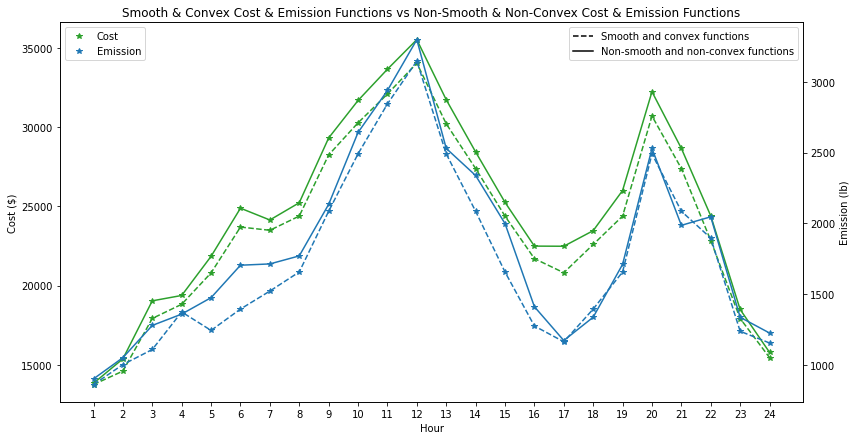

In [35]:
hours = list(range(1, 25))

smooth_convex_costs = schedules1_df["Total Cost"].to_numpy()
smooth_convex_emissions = schedules1_df["Total Emission"].to_numpy()

non_smooth_convex_costs = schedules4_df["Total Cost"].to_numpy()
non_smooth_convex_emissions = schedules4_df["Total Emission"].to_numpy()

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Hour')
ax1.set_ylabel('Cost ($)')
ax1.plot(hours, smooth_convex_costs, color='tab:green', label='RCGWO Cost', linestyle='--', marker='*')
ax1.plot(hours, non_smooth_convex_costs, color='tab:green', label='MADRL Cost', linestyle='-', marker='*')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.set_ylabel('Emission (lb)')
ax2.plot(hours, smooth_convex_emissions, color='tab:blue', label='RCGWO Emission', linestyle='--', marker='*')
ax2.plot(hours, non_smooth_convex_emissions, color='tab:blue', label='MADRL Emission', linestyle='-', marker='*')
ax2.tick_params(axis='y')

legend_lines_methods = [Line2D([0], [0], color='black', linestyle='--', marker=' '),
                        Line2D([0], [0], color='black', linestyle='-', marker=' ')]
ax1.legend(legend_lines_methods, ['Smooth and convex functions', 'Non-smooth and non-convex functions'], loc='upper right')

legend_lines_objectives = [Line2D([0], [0], color='tab:green', linestyle=' ', marker='*'),
                           Line2D([0], [0], color='tab:blue', linestyle=' ', marker='*')]
ax2.legend(legend_lines_objectives, ['Cost', 'Emission'], loc='upper left')

ax1.set_xticks(hours)
ax1.set_xticklabels(range(1, 25))

fig.tight_layout()
plt.title('Smooth & Convex Cost & Emission Functions vs Non-Smooth & Non-Convex Cost & Emission Functions')
plt.savefig('fig.png', dpi=300)
plt.show()

## 2. Tri-Objective Problem

### 2.1. Without Ramp Rate Constraints

In [36]:
env5 = SimEnv(supply_df  = supply_df,
              demand_df  = demand_df,
              n_objs     = "Tri",
              RR         = "No",
              VPE        = "No",
              SR         = 0.10,
              w          = [0.61, 0.06, 0.33],
             )

model5 = DQNet(environ = env5,
               hidden_nodes = 64
              ) 

RL_agents5 = DQNAgents(environ       = env5,
                       model         = model5,
                       epsilon_decay = 0.999,
                       lr            = 0.01,
                      )

memory5 = ReplayMemory(environ = env5,
                       buffer_size = 64
                      )

results5_df = RL_agents5.train(memory       = memory5,
                               batch_size   = 64,
                               num_episodes = 10000
                              )
results5_df.to_excel('results_tri-ojective_RR-No_VPE-No.xlsx', index = False)
results5_df

TRI OBJECTIVES (Cost, emis1 and emis2): w = [0.61, 0.06, 0.33], RR = no, VPE = no, SR = 0.1


  0%|          | 0/10000 [00:00<?, ?it/s]

Episode: 1000 | Steps = 24.0 | Rewards = 75.49 | Eps. = 0.368 | LR = 0.010 | Cost = 585538.9 | emis1 = 86303.3 | emis2 = 154838.0 | 
Episode: 2000 | Steps = 24.0 | Rewards = 75.43 | Eps. = 0.135 | LR = 0.010 | Cost = 572927.5 | emis1 = 83466.3 | emis2 = 160651.5 | 
Episode: 3000 | Steps = 24.0 | Rewards = 74.91 | Eps. = 0.050 | LR = 0.010 | Cost = 568014.4 | emis1 = 82260.3 | emis2 = 161512.9 | 
Episode: 4000 | Steps = 24.0 | Rewards = 74.92 | Eps. = 0.018 | LR = 0.010 | Cost = 568014.3 | emis1 = 82260.4 | emis2 = 161513.1 | 
Episode: 5000 | Steps = 24.0 | Rewards = 74.92 | Eps. = 0.007 | LR = 0.010 | Cost = 568014.4 | emis1 = 82260.4 | emis2 = 161513.0 | 
Episode: 6000 | Steps = 24.0 | Rewards = 74.92 | Eps. = 0.002 | LR = 0.010 | Cost = 568014.4 | emis1 = 82260.4 | emis2 = 161512.9 | 
Episode: 7000 | Steps = 24.0 | Rewards = 74.92 | Eps. = 0.001 | LR = 0.010 | Cost = 568014.4 | emis1 = 82260.3 | emis2 = 161513.0 | 
Episode: 8000 | Steps = 24.0 | Rewards = 74.92 | Eps. = 0.000 | LR = 

,Episode,Timesteps,Rewards,Startup Cost,Shutdown Cost,Production Cost,Total Cost,Startup Emission1,Shutup Emission1,Production Emission1,Total Emission1,Startup Emission2,Shutup Emission2,Production Emission2,Total Emission2
0,1.0,24,74.334579,4110.0,0.0,600573.9,604683.9,0.0,0.0,90451.6,90451.6,0.0,0.0,155252.1,155252.1
1,2.0,24,74.502232,4520.0,0.0,599242.5,603762.5,0.0,0.0,90085.5,90085.5,0.0,0.0,155390.2,155390.2
2,3.0,24,74.290716,4490.0,0.0,605822.1,610312.1,0.0,0.0,91569.0,91569.0,0.0,0.0,156174.2,156174.2
3,4.0,24,74.395136,5250.0,0.0,597484.7,602734.7,0.0,0.0,89785.7,89785.7,0.0,0.0,158826.7,158826.7
4,5.0,24,73.899936,4190.0,0.0,601985.0,606175.0,0.0,0.0,90951.5,90951.5,0.0,0.0,149670.4,149670.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996.0,24,74.922448,4100.0,0.0,563914.3,568014.3,0.0,0.0,82260.4,82260.4,0.0,0.0,161513.0,161513.0
9996,9997.0,24,74.922462,4100.0,0.0,563914.4,568014.4,0.0,0.0,82260.3,82260.3,0.0,0.0,161513.0,161513.0
9997,9998.0,24,74.922454,4100.0,0.0,563914.3,568014.3,0.0,0.0,82260.4,82260.4,0.0,0.0,161513.1,161513.1
9998,9999.0,24,74.922451,4100.0,0.0,563914.4,568014.4,0.0,0.0,82260.4,82260.4,0.0,0.0,161513.1,161513.1


In [37]:
schedules5_df = get_schedules(environ = env5, trained_agents = RL_agents5)
schedules5_df.to_excel('schedules_tri-ojective_RR-No_VPE-No.xlsx', index = False)
schedules5_df

Total cost = 568014.4 $/day.
Total Emission1 = 82260.3 lbs/day.
Total Emission2 = 161513.0 lbs/day.


,Hour,Demand,U1,U2,U3,U4,U5,U6,U7,U8,U9,U10,P_1,P_2,P_3,P_4,P_5,P_6,P_7,P_8,P_9,P_10,Reserve (%),Startup Cost,Shutdown Cost,Production Cost,Total Cost,Startup Emission1,Shutdown Emission1,Production Emission1,Total Emission1,Startup Emission2,Shutdown Emission2,Production Emission2,Total Emission2
0,1,700.0,1,1,0,0,0,0,0,0,0,0,358.3,341.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,13766.4,13766.4,0.0,0.0,1891.3,1891.3,0.0,0.0,3467.4,3467.4
1,2,750.0,1,1,0,0,0,0,0,0,0,0,382.6,367.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.3,0.0,0.0,14617.8,14617.8,0.0,0.0,2001.8,2001.8,0.0,0.0,4088.4,4088.4
2,3,850.0,1,1,0,0,1,0,0,0,0,0,392.7,378.2,0.0,0.0,79.1,0.0,0.0,0.0,0.0,0.0,26.1,900.0,0.0,17007.0,17907.0,0.0,0.0,2380.4,2380.4,0.0,0.0,4708.7,4708.7
3,4,950.0,1,1,0,0,1,0,0,0,0,0,435.1,423.4,0.0,0.0,91.6,0.0,0.0,0.0,0.0,0.0,12.8,0.0,0.0,18754.7,18754.7,0.0,0.0,2606.0,2606.0,0.0,0.0,6069.1,6069.1
4,5,1000.0,1,1,1,0,1,0,0,0,0,0,401.2,387.3,130.0,0.0,81.6,0.0,0.0,0.0,0.0,0.0,20.2,550.0,0.0,20248.0,20798.0,0.0,0.0,2895.9,2895.9,0.0,0.0,5465.4,5465.4
5,6,1100.0,1,1,1,1,1,0,0,0,0,0,392.1,377.6,130.0,121.3,78.9,0.0,0.0,0.0,0.0,0.0,21.1,1120.0,0.0,22588.6,23708.6,0.0,0.0,3305.6,3305.6,0.0,0.0,5889.6,5889.6
6,7,1150.0,1,1,1,1,1,0,0,0,0,0,410.8,397.5,130.0,127.2,84.4,0.0,0.0,0.0,0.0,0.0,15.8,0.0,0.0,23459.2,23459.2,0.0,0.0,3421.3,3421.3,0.0,0.0,6537.4,6537.4
7,8,1200.0,1,1,1,1,1,0,0,0,0,0,430.8,418.9,130.0,130.0,90.3,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,24332.2,24332.2,0.0,0.0,3535.9,3535.9,0.0,0.0,7228.7,7228.7
8,9,1300.0,1,1,1,1,1,1,1,0,0,0,443.5,432.4,130.0,130.0,94.0,45.1,25.0,0.0,0.0,0.0,15.2,860.0,0.0,27417.9,28277.9,0.0,0.0,4044.5,4044.5,0.0,0.0,7957.8,7957.8
9,10,1400.0,1,1,1,1,1,1,1,1,0,0,455.0,455.0,130.0,130.0,118.0,59.8,26.9,25.2,0.0,0.0,10.9,60.0,0.0,30207.2,30267.2,0.0,0.0,4502.4,4502.4,0.0,0.0,9036.5,9036.5


### 2.2. With Ramp Rate Constraints

In [35]:
env6 = SimEnv(supply_df  = supply_df,
              demand_df  = demand_df,
              n_objs     = "tri",
              RR         = "Yes",
              VPE        = "No",
              SR         = 0.10,
              w          = [0.41, 0.28, 0.31],
             )

model6 = DQNet(environ = env6,
               hidden_nodes = 64                        # default => 32
              ) 

RL_agents6 = DQNAgents(environ       = env6,
                       model         = model6,
                       epsilon_decay = 0.999,
                       lr            = 0.01,
                      )

memory6 = ReplayMemory(environ = env6,
                       buffer_size = 64
                      )

results6_df = RL_agents6.train(memory       = memory6,
                               batch_size   = 64,
                               num_episodes = 10000
                              )
results6_df.to_excel('results_tri-ojective_RR-Yes_VPE-No.xlsx', index = False)
results6_df

TRI OBJECTIVES (Cost, emis1 and emis2): w = [0.41, 0.28, 0.31], RR = yes, VPE = no, SR = 0.1


  0%|          | 0/10000 [00:00<?, ?it/s]

C:\Users\esawo\anaconda3\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Episode: 1000 | Steps = 24.0 | Rewards = 75.42 | Eps. = 0.368 | LR = 0.010 | Cost = 585092.7 | emis1 = 85580.8 | emis2 = 164068.0 | 
Episode: 2000 | Steps = 24.0 | Rewards = 74.42 | Eps. = 0.135 | LR = 0.010 | Cost = 570655.1 | emis1 = 82799.4 | emis2 = 161809.9 | 
Episode: 3000 | Steps = 24.0 | Rewards = 75.39 | Eps. = 0.050 | LR = 0.010 | Cost = 571749.4 | emis1 = 83235.3 | emis2 = 159127.1 | 
Episode: 4000 | Steps = 24.0 | Rewards = 74.96 | Eps. = 0.018 | LR = 0.010 | Cost = 569845.8 | emis1 = 82712.7 | emis2 = 161265.2 | 
Episode: 5000 | Steps = 24.0 | Rewards = 74.96 | Eps. = 0.007 | LR = 0.010 | Cost = 568186.2 | emis1 = 82373.9 | emis2 = 161196.5 | 
Episode: 6000 | Steps = 24.0 | Rewards = 75.08 | Eps. = 0.002 | LR = 0.010 | Cost = 568186.3 | emis1 = 82373.8 | emis2 = 161196.4 | 
Episode: 7000 | Steps = 24.0 | Rewards = 74.96 | Eps. = 0.001 | LR = 0.010 | Cost = 568999.1 | emis1 = 82543.8 | emis2 = 161208.2 | 
Episode: 8000 | Steps = 24.0 | Rewards = 74.96 | Eps. = 0.000 | LR = 

,Episode,Timesteps,Rewards,Startup Cost,Shutdown Cost,Production Cost,Total Cost,Startup Emission1,Shutup Emission1,Production Emission1,Total Emission1,Startup Emission2,Shutup Emission2,Production Emission2,Total Emission2
0,1.0,24,74.347589,4570.0,0.0,601981.7,606551.7,0.0,0.0,90713.0,90713.0,0.0,0.0,155407.6,155407.6
1,2.0,24,74.428970,4020.0,0.0,600104.9,604124.9,0.0,0.0,90622.4,90622.4,0.0,0.0,154576.6,154576.6
2,3.0,24,74.631173,4760.0,0.0,596465.6,601225.6,0.0,0.0,89530.6,89530.6,0.0,0.0,153598.7,153598.7
3,4.0,24,75.230637,4260.0,0.0,597871.2,602131.2,0.0,0.0,89919.1,89919.1,0.0,0.0,153147.7,153147.7
4,5.0,24,74.854621,5010.0,0.0,597972.8,602982.8,0.0,0.0,90141.5,90141.5,0.0,0.0,155551.0,155551.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996.0,24,74.956199,4100.0,0.0,564086.4,568186.4,0.0,0.0,82373.9,82373.9,0.0,0.0,161196.3,161196.3
9996,9997.0,24,74.956205,4100.0,0.0,564086.3,568186.3,0.0,0.0,82373.9,82373.9,0.0,0.0,161196.1,161196.1
9997,9998.0,24,74.956195,4100.0,0.0,564086.2,568186.2,0.0,0.0,82373.9,82373.9,0.0,0.0,161196.3,161196.3
9998,9999.0,24,74.956213,4100.0,0.0,564086.3,568186.3,0.0,0.0,82373.8,82373.8,0.0,0.0,161196.1,161196.1


In [36]:
schedules6_df = get_schedules(environ = env6, trained_agents = RL_agents6)
schedules6_df.to_excel('schedules_tri-ojective_RR-Yes_VPE-No.xlsx', index = False)
schedules6_df

Total cost = 568186.4 $/day.
Total Emission1 = 82373.9 lbs/day.
Total Emission2 = 161196.5 lbs/day.


,Hour,Demand,U1,U2,U3,U4,U5,U6,U7,U8,U9,U10,P_1,P_2,P_3,P_4,P_5,P_6,P_7,P_8,P_9,P_10,Reserve (%),Startup Cost,Shutdown Cost,Production Cost,Total Cost,Startup Emission1,Shutdown Emission1,Production Emission1,Total Emission1,Startup Emission2,Shutdown Emission2,Production Emission2,Total Emission2
0,1,700.0,1,1,0,0,0,0,0,0,0,0,359.4,340.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,13765.4,13765.4,0.0,0.0,1891.3,1891.3,0.0,0.0,3469.6,3469.6
1,2,750.0,1,1,0,0,0,0,0,0,0,0,383.7,366.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.3,0.0,0.0,14616.7,14616.7,0.0,0.0,2001.8,2001.8,0.0,0.0,4090.7,4090.7
2,3,850.0,1,1,0,0,1,0,0,0,0,0,393.4,376.6,0.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0,26.1,900.0,0.0,17009.1,17909.1,0.0,0.0,2380.6,2380.6,0.0,0.0,4705.8,4705.8
3,4,950.0,1,1,0,0,1,0,0,0,0,0,436.0,421.9,0.0,0.0,92.1,0.0,0.0,0.0,0.0,0.0,12.8,0.0,0.0,18755.3,18755.3,0.0,0.0,2606.2,2606.2,0.0,0.0,6068.8,6068.8
4,5,1000.0,1,1,1,0,1,0,0,0,0,0,401.9,385.7,130.0,0.0,82.4,0.0,0.0,0.0,0.0,0.0,20.2,550.0,0.0,20249.8,20799.8,0.0,0.0,2896.1,2896.1,0.0,0.0,5463.0,5463.0
5,6,1100.0,1,1,1,1,1,0,0,0,0,0,392.5,375.7,130.0,122.0,79.8,0.0,0.0,0.0,0.0,0.0,21.1,1120.0,0.0,22590.5,23710.5,0.0,0.0,3306.2,3306.2,0.0,0.0,5886.1,5886.1
6,7,1150.0,1,1,1,1,1,0,0,0,0,0,411.4,395.7,130.0,127.8,85.1,0.0,0.0,0.0,0.0,0.0,15.8,0.0,0.0,23460.5,23460.5,0.0,0.0,3421.8,3421.8,0.0,0.0,6535.1,6535.1
7,8,1200.0,1,1,1,1,1,0,0,0,0,0,431.8,417.4,130.0,130.0,90.9,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,24332.9,24332.9,0.0,0.0,3536.0,3536.0,0.0,0.0,7228.2,7228.2
8,9,1300.0,1,1,1,1,1,1,1,0,0,0,442.7,428.9,130.0,130.0,93.9,49.4,25.0,0.0,0.0,0.0,15.2,860.0,0.0,27441.7,28301.7,0.0,0.0,4050.7,4050.7,0.0,0.0,7916.8,7916.8
9,10,1400.0,1,1,1,1,1,1,1,1,0,0,455.0,455.0,130.0,130.0,114.0,62.3,25.0,28.7,0.0,0.0,10.9,60.0,0.0,30219.2,30279.2,0.0,0.0,4514.7,4514.7,0.0,0.0,9011.3,9011.3


### One Click Run

All the above 6 experiments can be run all in one.

In [ ]:
from pymops.main import main

main

### Citation

Users should cite the following resources. 

- Code Ocean Reproducible Capsule: https://codeocean.com/capsule/0242917/tree:

  - **Ebrie, A.S.**;, **Kim, Y.J.** (2023). pymops: *A multi-agent reinforcement learning simulation environment for multi-objective optimization in power scheduling* [Software Code]. https://doi.org/10.24433/CO.9235622.v1 
  
- **[Article](https://www.mdpi.com/1996-1073/16/16/5920) produced from the very first version of the package:
  - **Ebrie, A.S.**; **Paik, C.**; **Chung, Y.**; **Kim, Y.J.** (2023). *Environment-Friendly Power Scheduling Based on Deep Contextual Reinforcement Learning*. *Energies*, 16, 5920. https://doi.org/10.3390/en16165920.   